<a href="https://colab.research.google.com/github/thor4/neuralnets/blob/master/projects/1-CNN/step5-test_iterations-van_gabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Iterations
--- 
## Import libraries

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar  2 18:04:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.special import expit #import sigmoid func
tf.random.set_seed(42) #set random seed for reproducibility

### 1. Load and prepare the data
---

### Download the models

These models were created using the `step4_train_iterations` Jupyter notebook. Run the cell to download a zip file from OSF then extract its contents into the newly created directory.

vanilla gabor models: `content/van_gabor-model_#/`

where # = [0,29]

In [4]:
# @title Download + unzip models

import requests, os
from zipfile import ZipFile

print("Start downloading and unzipping vanilla models trained on Gabors...")
name = 'van_gabor_models'
fname = f"{name}.zip"
url = f"https://osf.io/wzy76/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall() #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")
!unzip 'van_gabor-model_*.zip'

Start downloading and unzipping vanilla models trained on Gabors...
Download completed.
Archive:  van_gabor-model_0.zip
caution: filename not matched:  van_gabor-model_10.zip
caution: filename not matched:  van_gabor-model_11.zip
caution: filename not matched:  van_gabor-model_12.zip
caution: filename not matched:  van_gabor-model_13.zip
caution: filename not matched:  van_gabor-model_14.zip
caution: filename not matched:  van_gabor-model_15.zip
caution: filename not matched:  van_gabor-model_16.zip
caution: filename not matched:  van_gabor-model_17.zip
caution: filename not matched:  van_gabor-model_18.zip
caution: filename not matched:  van_gabor-model_19.zip
caution: filename not matched:  van_gabor-model_1.zip
caution: filename not matched:  van_gabor-model_20.zip
caution: filename not matched:  van_gabor-model_21.zip
caution: filename not matched:  van_gabor-model_22.zip
caution: filename not matched:  van_gabor-model_23.zip
caution: filename not matched:  van_gabor-model_24.zip
c

In [8]:
# @title Delete all zip files to save space.
dir_name = os.getcwd()
test = os.listdir(dir_name)
for item in test:
    if item.endswith(".zip"):
        os.remove(os.path.join(dir_name, item))

### Load the model
Next, we load the models using Tensorflow

In [9]:
# @title Load models
model0 = tf.keras.models.load_model('van_gabor-model_0')
model1 = tf.keras.models.load_model('van_gabor-model_1')
model2 = tf.keras.models.load_model('van_gabor-model_2')
model3 = tf.keras.models.load_model('van_gabor-model_3')
model4 = tf.keras.models.load_model('van_gabor-model_4')
model5 = tf.keras.models.load_model('van_gabor-model_5')
model6 = tf.keras.models.load_model('van_gabor-model_6')
model7 = tf.keras.models.load_model('van_gabor-model_7')
model8 = tf.keras.models.load_model('van_gabor-model_8')
model9 = tf.keras.models.load_model('van_gabor-model_9')
model10 = tf.keras.models.load_model('van_gabor-model_10')
model11 = tf.keras.models.load_model('van_gabor-model_11')
model12 = tf.keras.models.load_model('van_gabor-model_12')
model13 = tf.keras.models.load_model('van_gabor-model_13')
model14 = tf.keras.models.load_model('van_gabor-model_14')
model15 = tf.keras.models.load_model('van_gabor-model_15')
model16 = tf.keras.models.load_model('van_gabor-model_16')
model17 = tf.keras.models.load_model('van_gabor-model_17')
model18 = tf.keras.models.load_model('van_gabor-model_18')
model19 = tf.keras.models.load_model('van_gabor-model_19')
model20 = tf.keras.models.load_model('van_gabor-model_20')
model21 = tf.keras.models.load_model('van_gabor-model_21')
model22 = tf.keras.models.load_model('van_gabor-model_22')
model23 = tf.keras.models.load_model('van_gabor-model_23')
model24 = tf.keras.models.load_model('van_gabor-model_24')
model25 = tf.keras.models.load_model('van_gabor-model_25')
model26 = tf.keras.models.load_model('van_gabor-model_26')
model27 = tf.keras.models.load_model('van_gabor-model_27')
model28 = tf.keras.models.load_model('van_gabor-model_28')
model29 = tf.keras.models.load_model('van_gabor-model_29')
model0.summary() #verify architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 160, 160, 1)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 158, 158, 160)     1600      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 79, 79, 160)      0         
 2D)                                                             
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 160)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 80)        115280    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 80)      

Download the 9 test datasets from OSF and extract the contents into the newly created directory: `content/datasets/`

In [10]:
# @title Download datasets to test the model

print("Start downloading and unzipping `9 datasets`...")
name = 'tilt_contrast-van_gabor'
fname = f"{name}.zip"
url = f"https://osf.io/wc3nr/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall("datasets") #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")

Start downloading and unzipping `9 datasets`...
Download completed.


Load all 9 training sets and use prefetch to streamline image loading.

In [11]:
# @title Load datasets into tensorflow

BATCH_SIZE = 32 
IMG_SIZE = (160, 160) #forces a resize from 170x170 since MobileNetV2 has weights only for certain sizes
AUTOTUNE = tf.data.AUTOTUNE #prompts the tf.data runtime to tune the value dynamically at runtime
def model2_init_sets(BATCH_SIZE, IMG_SIZE, AUTOTUNE):
    curr_dir = os.getcwd() 
    set1_dir = os.path.join(curr_dir, 'datasets/t_0_05-c_0_3')
    set2_dir = os.path.join(curr_dir, 'datasets/t_0_05-c_0_45')
    set3_dir = os.path.join(curr_dir, 'datasets/t_0_05-c_1')
    set4_dir = os.path.join(curr_dir, 'datasets/t_0_1313-c_0_3')
    set5_dir = os.path.join(curr_dir, 'datasets/t_0_1313-c_0_45')
    set6_dir = os.path.join(curr_dir, 'datasets/t_0_1313-c_1')
    set7_dir = os.path.join(curr_dir, 'datasets/t_0_2125-c_0_3')
    set8_dir = os.path.join(curr_dir, 'datasets/t_0_2125-c_0_45')
    set9_dir = os.path.join(curr_dir, 'datasets/t_0_2125-c_1')
    set1 = image_dataset_from_directory(set1_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale') #2000 images 2 classes
    set2 = image_dataset_from_directory(set2_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')    
    set3 = image_dataset_from_directory(set3_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
    set4 = image_dataset_from_directory(set4_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
    set5 = image_dataset_from_directory(set5_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
    set6 = image_dataset_from_directory(set6_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
    set7 = image_dataset_from_directory(set7_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale') 
    set8 = image_dataset_from_directory(set8_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
    set9 = image_dataset_from_directory(set9_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
    class_names = set1.class_names #extract class names loading function inferred from subdir's
    set1 = set1.prefetch(buffer_size=AUTOTUNE) 
    set2 = set2.prefetch(buffer_size=AUTOTUNE) 
    set3 = set3.prefetch(buffer_size=AUTOTUNE) 
    set4 = set4.prefetch(buffer_size=AUTOTUNE) 
    set5 = set5.prefetch(buffer_size=AUTOTUNE) 
    set6 = set6.prefetch(buffer_size=AUTOTUNE) 
    set7 = set7.prefetch(buffer_size=AUTOTUNE) 
    set8 = set8.prefetch(buffer_size=AUTOTUNE) 
    set9 = set9.prefetch(buffer_size=AUTOTUNE) 
    return set1,set2,set3,set4,set5,set6,set7,set8,set9,class_names

set1,set2,set3,set4,set5,set6,set7,set8,set9,class_names = model2_init_sets(BATCH_SIZE, IMG_SIZE, AUTOTUNE)

Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


There are 4,000 images per set, 2,000 per class, 36,000 total across sets.

### 2. Generate logits
Next, we can define a function for processing a dataset through a model.

In [12]:
def process_dataset(dataset, model):
    all_logits=tf.zeros([], tf.float64) #initialize array to hold all prediction logits (single element)
    all_labels=tf.zeros([], tf.float64) #initialize array to hold all actual labels (single element)
    for image_batch, label_batch in dataset.as_numpy_iterator():
        predictions = model.predict_on_batch(image_batch).flatten() #run batch through model and return logits
        all_logits = tf.experimental.numpy.append(all_logits, predictions)
        all_labels = tf.experimental.numpy.append(all_labels, label_batch)
    #tf.size(all_pred) #1335 elements, 1334 images + 1 placeholder 0 at beginning
    all_logits = all_logits[1:] #remove placeholder at beginning
    all_labels = all_labels[1:]
    all_logits_sig = expit(all_logits) #sigmoid-transform the logits
    all_pred = np.where((all_logits_sig < 0.5), 0, 1) #replace predictions with 0 or 1
    all_acc = np.where((all_pred == all_labels), 1, 0) #decide whether pred = label
    return all_logits,all_labels,all_pred,all_acc

Next, let's define a function for processing all 9 datasets through a model. In it, we will stack each sets' 4,000 logits in a single dataframe, `df_set`. The resulting dataframe will have 36,000 logits resulting from vertically stacking the logits for set1, set 2, .., set9. Additionally, we will calculate the average raw confidence and accuracy scores for each tilt/contrast combination and save this in a separate dataframe called `df_model_results`.

In [13]:
def process_model(model,set1,set2,set3,set4,set5,set6,set7,set8,set9):
    df_set = pd.DataFrame(columns=['Logits','Labels','Predictions','Accuracy','Tilt',
                              'Contrast']) #init dataframe
    df_model_results = pd.DataFrame(columns=['Accuracy','Confidence']) #init dataframe
    all_sets = [set1,set2,set3,set4,set5,set6,set7,set8,set9]
    all_tilts = [0.05, 0.05, 0.05, 0.1313, 0.1313, 0.1313, 0.2125, 0.2125, 0.2125]
    all_contrasts = [0.3, 0.45, 1, 0.3, 0.45, 1, 0.3, 0.45, 1]
    for idx, dataset in enumerate(all_sets): #run for all sets:
        tilt = all_tilts[idx]
        contrast = all_contrasts[idx]
        all_logits,all_labels,all_pred,all_acc = process_dataset(dataset, model)
        tilts = np.repeat(tilt, all_pred.size)
        contrasts = np.repeat(contrast, all_pred.size)
        df_set = pd.concat([df_set, pd.DataFrame({'Logits':all_logits.numpy(),
                                          'Labels':all_labels.numpy(),
                                          'Predictions':all_pred,'Accuracy':all_acc,
                                          'Tilt':tilts,'Contrast':contrasts})], 
                      axis=0, ignore_index=True) #append logits, labels,etc to dataframe
        acc = all_acc.mean() #calculate avg accuracy
        conf = np.absolute(all_logits.numpy()).mean()
        df_model_results = pd.concat([df_results, pd.DataFrame({'Accuracy':[acc],
                                                    'Confidence':[conf],
                                                    'Tilt':tilt,'Contrast':contrast})], 
                          axis=0, ignore_index=True) #append acc & conf to dataframe
    return df_set,df_model_results

# STOPPED HERE, NEED TO PROCESS A MODEL AND EXPORT DF'S AS EXCEL FILES AND SAVE THEM TO DISK EACH TIME WITH DYNAMIC NAMING CONVENTION


### Standardize the data
The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general we should seek to make our input values small. We will standardize values to be in the `[0, 1]` range by using the `tf.keras.layers.experimental.preprocessing.Rescaling` layer.

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y)) #apply normalization to dataset
image_batch, labels_batch = next(iter(normalized_ds)) #extract one batch from the norm'd dataset
first_image = image_batch[0] #view first image from the batch
image_batch2, labels_batch2 = next(iter(train_dataset)) #extract one batch from the original dataset
first_image2 = image_batch2[0] #view first image from the batch
print(f"before normalization:",np.min(first_image2),np.max(first_image2),"\n",
      f"after normalization:",np.min(first_image),np.max(first_image)) #notice the pixels values are now in `[0,1]`.

before normalization: 0.7294922 254.38867 
 after normalization: 0.007877605 0.9995214


Now that we are convinced the normalization works, we will include it as the first layer inside our model definition below to simplify deployment.

### Setup buffered prefetching
We can configure the dataset for performance using buffered prefetching to load images from disk without having I/O become blocking

In [ ]:
def prefetch(train_dataset, validation_dataset, test_dataset):
    AUTOTUNE = tf.data.AUTOTUNE #prompts the tf.data runtime to tune the value dynamically at runtime
    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE) #will prefetch an optimal number of batches
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE) #will prefetch an optimal number of batches
    test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE) #will prefetch an optimal number of batches
    return train_dataset,validation_dataset,test_dataset,AUTOTUNE

train_dataset, validation_dataset, test_dataset, AUTOTUNE = prefetch(train_dataset, validation_dataset, test_dataset)

### Create the model

The first 3 lines of code below instantiate the Sequential model definition, declare the input shape of the images then apply the normalization layer.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. color_channels refers to (R,G,B). We will configure the CNN to process inputs of shape (160, 160, 3), which is the format of our Gabors. We can do this by passing the argument `input_shape` to the first layer titled `InputLayer`.

The next 5 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

To complete the model, we will feed the last output tensor from the convolutional base (of shape (36, 36, 320)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. Our dataset has 2 output classes, so we use a final Dense layer with a single logit output prediction.

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(160,160,1)))
model.add(layers.experimental.preprocessing.Rescaling(1./255)) #normalization layer
model.add(layers.Conv2D(160, (3, 3), activation='relu', input_shape=(160, 160, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #flatten from 3d output to 1d
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(1))

Let's display the architecture of the model so far:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 158, 158, 160)     1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 160)      0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 160)      0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 80)        115280    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 80)       0

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 160 or 80). 

Finally, we see that (18, 18, 80) outputs were flattened into vectors of shape (25920) before going through two Dense layers.

### Compile and train the model

We will define the learning rate and use the BinaryCrossEntropy loss since the model provides a single linear output

In [ ]:
base_learning_rate = 0.0001 #define the learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(train_dataset, 
                    epochs=2, 
                    validation_data=validation_dataset) #tests against validation dataset after each iteration

Epoch 1/2
438/438 [==============================] - 90s 178ms/step - loss: 0.6829 - accuracy: 0.5011 - val_loss: 0.6202 - val_accuracy: 0.5972
Epoch 2/2
438/438 [==============================] - 74s 168ms/step - loss: 0.2872 - accuracy: 0.8616 - val_loss: 0.1374 - val_accuracy: 0.9405


### Evaluate the model
Let's make a plot to visualize how the training and validation accuracy improves with each epoch. We will also evaluate the model against the test dataset.

44/44 - 4s - loss: 0.1436 - accuracy: 0.9323 - 4s/epoch - 82ms/step


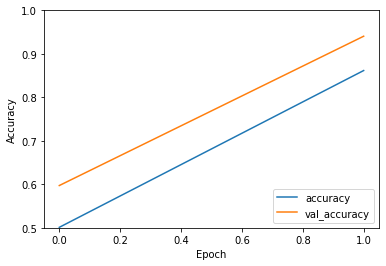

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)

Nicely done! The model achieved a 94.05% accuracy on the validation set and a 93.23% accuracy on the test set after 2 epochs. Now let's save our vanilla CNN model.

In [ ]:
model.save('van_gabor')

INFO:tensorflow:Assets written to: van_gabor/assets


In [ ]:
os.getcwd()

'/content/model_training-range_con_rand_tilt_0_05-2'

In [ ]:
! zip -r van_gabor_model.zip van_gabor/

  adding: van_gabor/ (stored 0%)
  adding: van_gabor/assets/ (stored 0%)
  adding: van_gabor/keras_metadata.pb (deflated 90%)
  adding: van_gabor/saved_model.pb (deflated 88%)
  adding: van_gabor/variables/ (stored 0%)
  adding: van_gabor/variables/variables.index (deflated 64%)
  adding: van_gabor/variables/variables.data-00000-of-00001 (deflated 46%)


In [ ]:
/content/model2_training/18kim_range_vanilla_v2/